In [44]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import yfinance as yf
import datetime


from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import LabelEncoder
# import sklearn as skl

# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.dates as mandates
# from sklearn import linear_model

# from keras.models import Sequential
# from keras.layers import Dense
# import keras.backend as K
# from keras.callbacks import EarlyStopping
# from keras.optimizers import Adam
# from keras.models import load_model
# from keras.layers import LSTM
# from keras.utils.vis_utils import plot_model

In [34]:
# msft = yf.Ticker("MSFT")

# get stock info
# msft.info

# # get historical market data
# hist = msft.history(period="max")

# # show actions (dividends, splits)
# msft.actions

# # show dividends
# msft.dividends

# # show splits
# msft.splits

# # show financials
# msft.financials
# msft.quarterly_financials

# # show major holders
# msft.major_holders

# # show institutional holders
# msft.institutional_holders

# # show balance sheet
# msft.balance_sheet
# msft.quarterly_balance_sheet

# # show cashflow
# msft.cashflow
# msft.quarterly_cashflow

# # show earnings
# msft.earnings
# msft.quarterly_earnings

# # show sustainability
# msft.sustainability

# # show analysts recommendations
# msft.recommendations

# # show next event (earnings, etc)
# msft.calendar

# # show ISIN code - *experimental*
# # ISIN = International Securities Identification Number
# msft.isin

# # show options expirations
# msft.options

# # show news
# msft.news

# # get option chain for specific expiration
# opt = msft.option_chain('YYYY-MM-DD')
# # data available via: opt.calls, opt.puts

# Importing the data and manipulation

In [45]:
# Grabbing the stock csv files and reading them in
stock_csv_list = ["resources/all_stocks_5yr.csv", "resources/stocks_list.csv"]

stock_list_df = pd.read_csv(stock_csv_list[0])
stock_name_df = pd.read_csv(stock_csv_list[1])

stock_list_df = stock_list_df.rename(columns = {"Name": "Symbol"})
stock_list_df

full_stock_df = stock_list_df.merge(stock_name_df, how = "left", on = "Symbol")
full_stock_df

,date,open,high,low,close,volume,Symbol,Name,Industry,Market Cap
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,American Airlines Group,Airlines,1.178875e+10
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,American Airlines Group,Airlines,1.178875e+10
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,American Airlines Group,Airlines,1.178875e+10
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,American Airlines Group,Airlines,1.178875e+10
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,American Airlines Group,Airlines,1.178875e+10
...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,Zoetis,Pharmaceuticals,9.075058e+10
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,Zoetis,Pharmaceuticals,9.075058e+10
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,Zoetis,Pharmaceuticals,9.075058e+10
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,Zoetis,Pharmaceuticals,9.075058e+10


In [ ]:
# Function to create the full stock df
def complete_stock_list(filepath):
    """
    Takes in a list of filepaths to csv files, loops through list and reads csv into df.
    Merges stock based on 

    Params: filepaht
    """
    stock_list_df = pd.read_csv(stock_csv_list[0])
    stock_name_df = pd.read_csv(stock_csv_list[1])

    stock_list_df = stock_list_df.rename(columns = {"Name": "Symbol"})
    stock_list_df

    full_stock_df = stock_list_df.merge(stock_name_df, how = "left", on = "Symbol")
    full_stock_df

In [30]:
stock_list_df

,date,open,high,low,close,volume,Symbol
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [3]:
# View info on df
full_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619040 entries, 0 to 619039
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        619040 non-null  object 
 1   open        619029 non-null  float64
 2   high        619032 non-null  float64
 3   low         619032 non-null  float64
 4   close       619040 non-null  float64
 5   volume      619040 non-null  int64  
 6   Symbol      619040 non-null  object 
 7   Name        558562 non-null  object 
 8   Industry    558562 non-null  object 
 9   Market Cap  558562 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 52.0+ MB


In [4]:
# Find unique data on stock symbol column
full_stock_df["Symbol"].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [5]:
# Grabbed the AAL stock
aal_stock = full_stock_df.loc[(full_stock_df["Symbol"] == "AAL"), :]
aal_stock

,date,open,high,low,close,volume,Symbol,Name,Industry,Market Cap
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,American Airlines Group,Airlines,1.178875e+10
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,American Airlines Group,Airlines,1.178875e+10
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,American Airlines Group,Airlines,1.178875e+10
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,American Airlines Group,Airlines,1.178875e+10
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,American Airlines Group,Airlines,1.178875e+10
...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL,American Airlines Group,Airlines,1.178875e+10
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL,American Airlines Group,Airlines,1.178875e+10
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL,American Airlines Group,Airlines,1.178875e+10
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL,American Airlines Group,Airlines,1.178875e+10


In [6]:
# Function that prints the shape of df and check for null values
def shape_and_null(df_name):
    # print(f"Unique Name: {df_name["Symbol"].unique()} and Unique Name Value: {df_name["Symbol"].nunique()}")
    print("Unique Name: ", df_name["Name"].unique())
    print("Unique Symbol", df_name["Symbol"].unique())
    print("Unique Name Value: ", df_name["Symbol"].nunique())
    print("Dataframe Shape: ", df_name.shape)
    print("Null Value Present: ", df_name.isnull().values.any())

shape_and_null(aal_stock)

Unique Name:  ['American Airlines Group']
Unique Symbol ['AAL']
Unique Name Value:  1
Dataframe Shape:  (1259, 10)
Null Value Present:  False


In [7]:
# Find a year's worth of data for
aal_stock_2013 = aal_stock.loc[((aal_stock["date"] >= "2013-02-08") & (aal_stock["date"] < "2014-01-01")), :]
aal_stock_2013

,date,open,high,low,close,volume,Symbol,Name,Industry,Market Cap
0,2013-02-08,15.07,15.12,14.630,14.75,8407500,AAL,American Airlines Group,Airlines,1.178875e+10
1,2013-02-11,14.89,15.01,14.260,14.46,8882000,AAL,American Airlines Group,Airlines,1.178875e+10
2,2013-02-12,14.45,14.51,14.100,14.27,8126000,AAL,American Airlines Group,Airlines,1.178875e+10
3,2013-02-13,14.30,14.94,14.250,14.66,10259500,AAL,American Airlines Group,Airlines,1.178875e+10
4,2013-02-14,14.94,14.96,13.160,13.99,31879900,AAL,American Airlines Group,Airlines,1.178875e+10
...,...,...,...,...,...,...,...,...,...,...
221,2013-12-24,26.00,26.26,26.000,26.25,2652974,AAL,American Airlines Group,Airlines,1.178875e+10
222,2013-12-26,26.12,26.36,25.975,26.13,4226639,AAL,American Airlines Group,Airlines,1.178875e+10
223,2013-12-27,25.95,26.10,24.910,24.94,13227018,AAL,American Airlines Group,Airlines,1.178875e+10
224,2013-12-30,24.87,25.25,24.650,24.78,8841369,AAL,American Airlines Group,Airlines,1.178875e+10


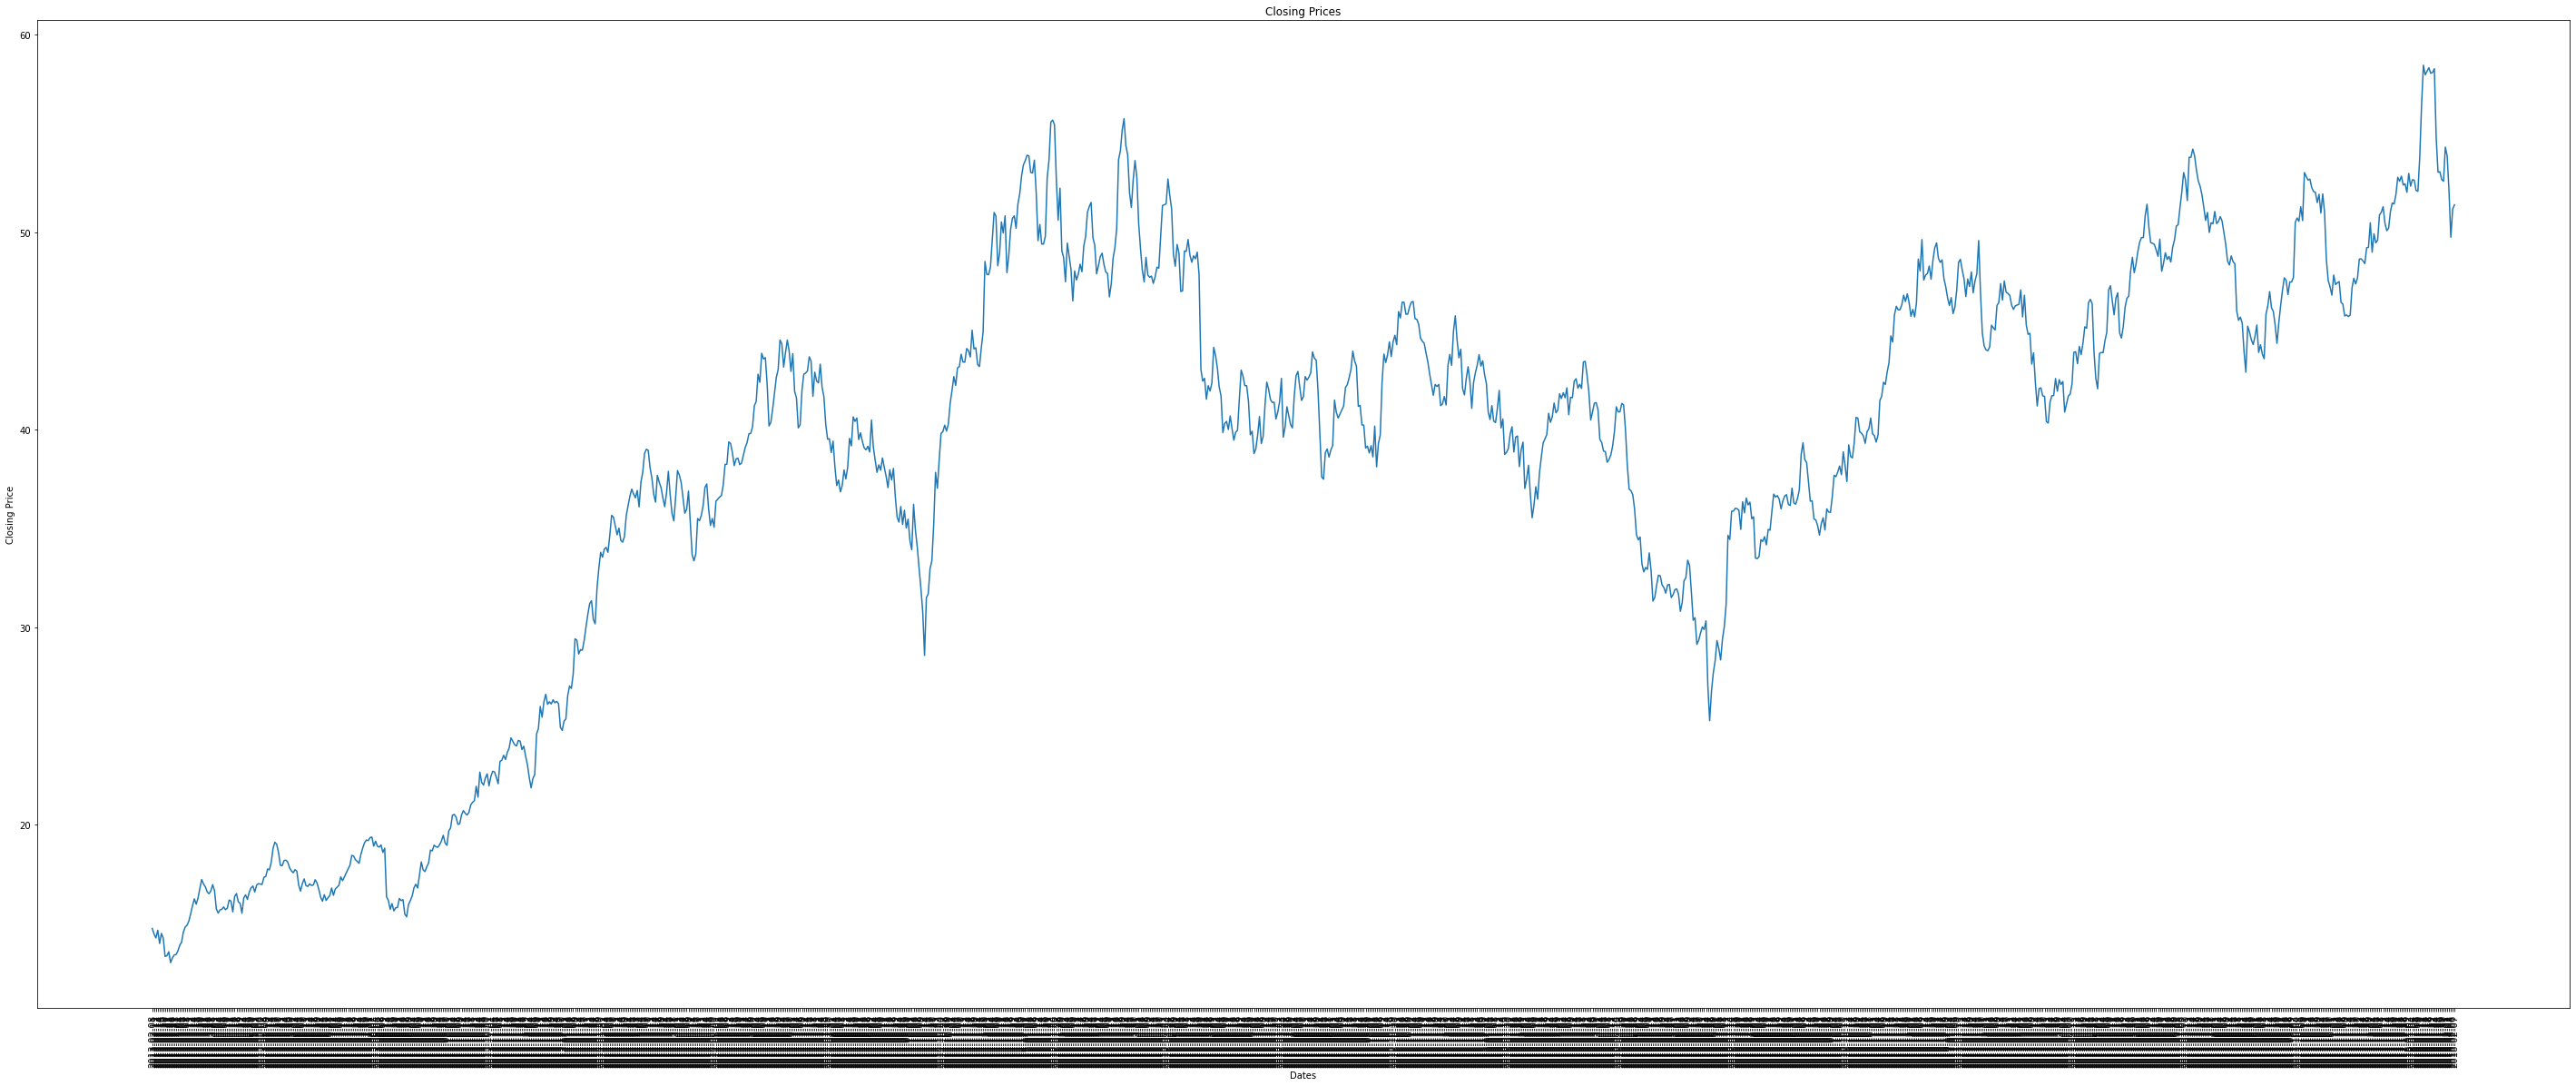

In [8]:
# Graph showing stock prices by date through the years
plt.figure(figsize = (50, 20))
plt.plot(aal_stock["date"], aal_stock["close"])
plt.title("Closing Prices")
plt.xlabel("Dates")
plt.ylabel("Closing Price")
plt.xticks(aal_stock["date"], rotation = "vertical")
plt.show()

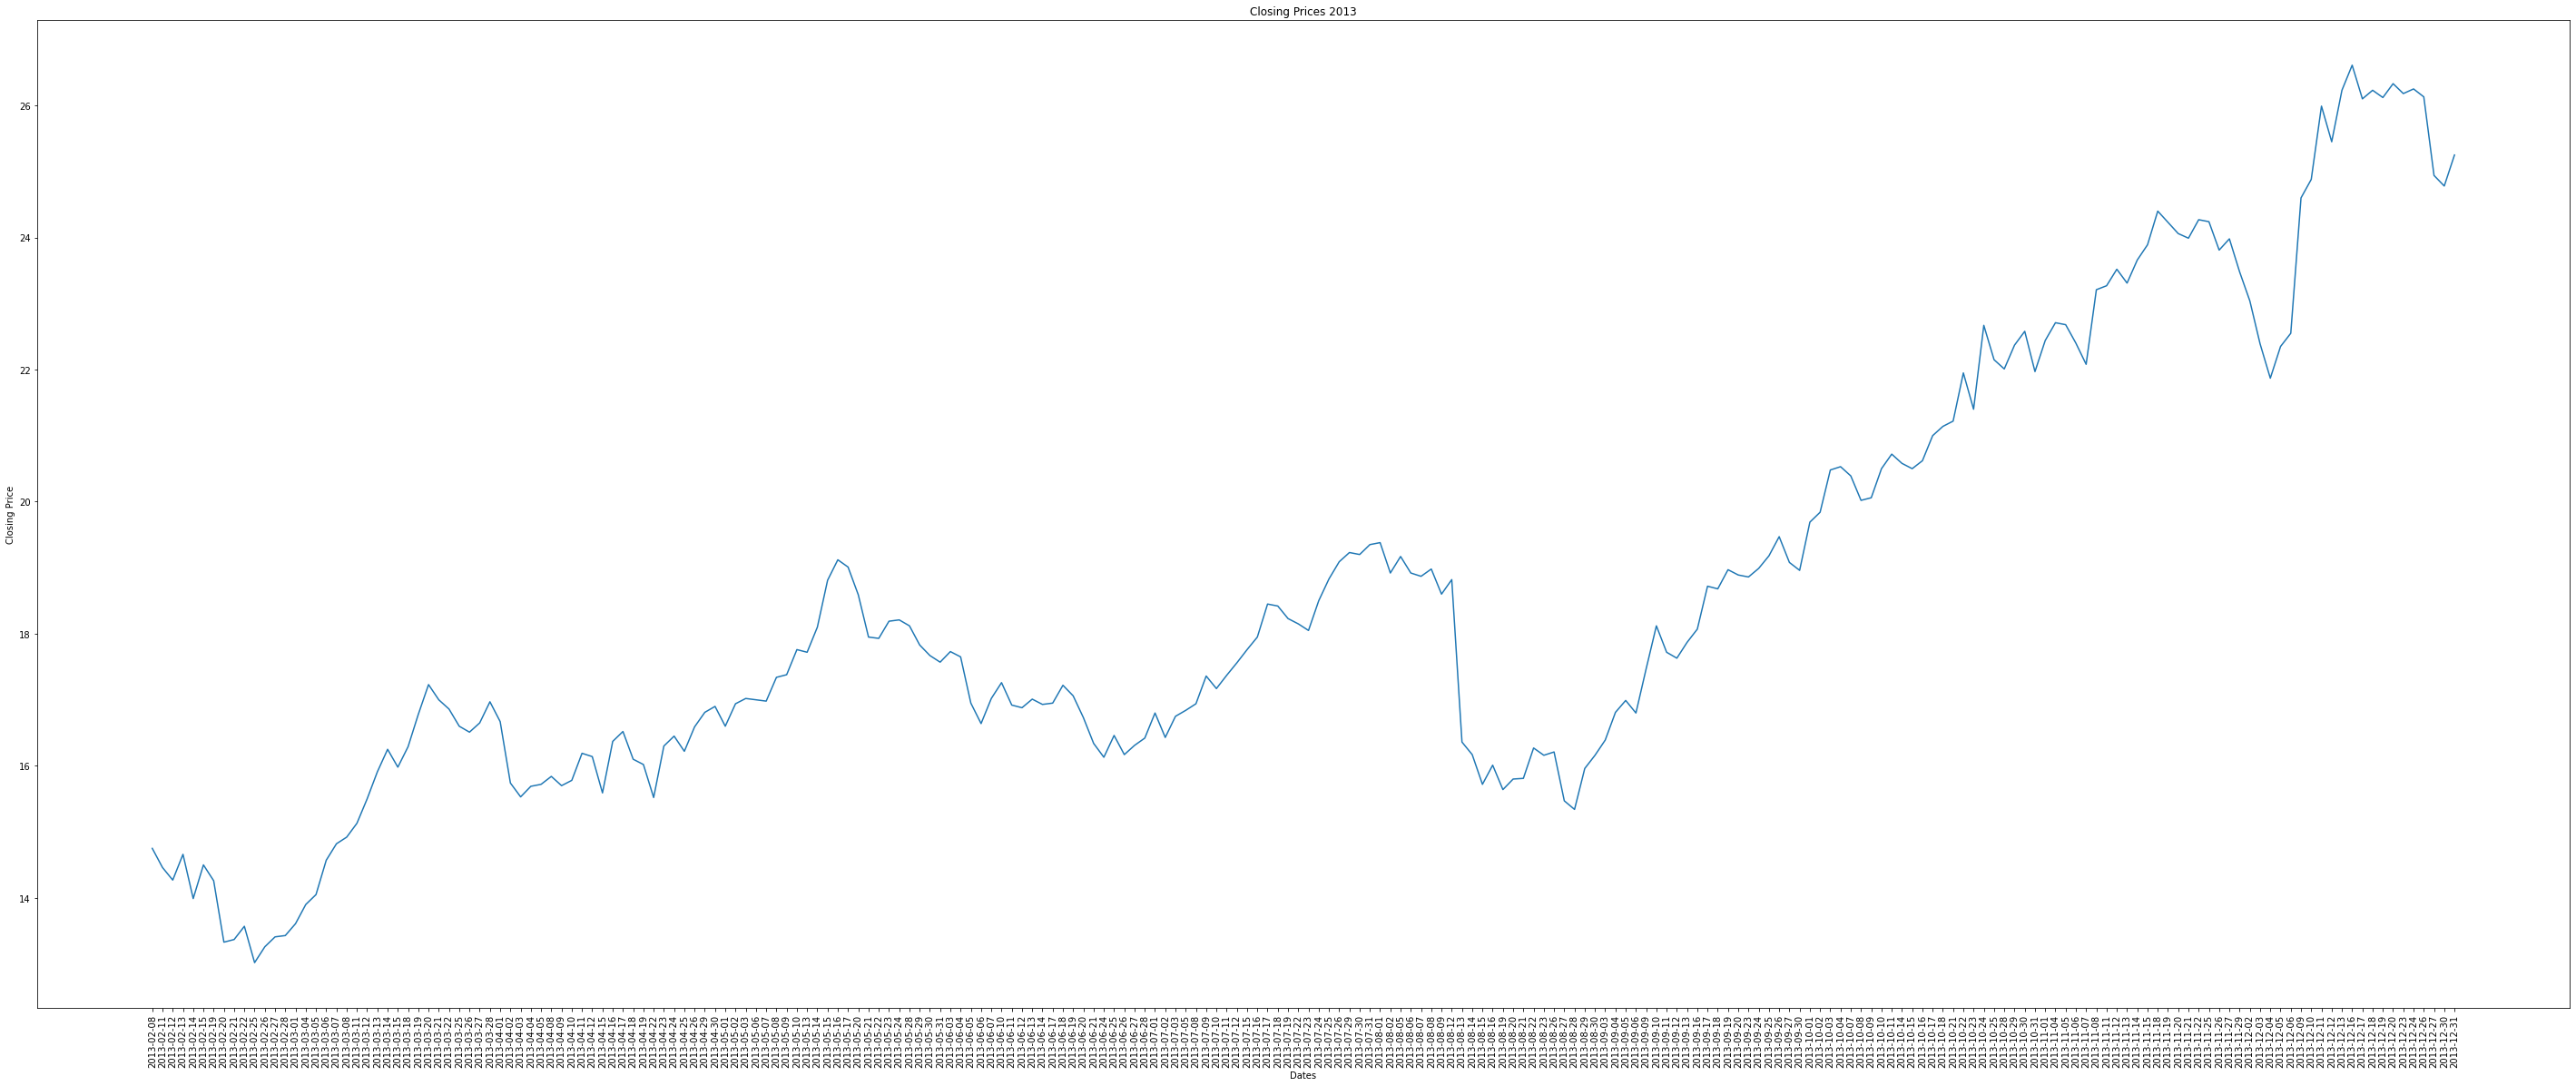

In [9]:
# Graph of aal stock for 2013 year
plt.figure(figsize = (50, 20))
plt.plot(aal_stock_2013["date"], aal_stock_2013["close"])
plt.title("Closing Prices 2013")
plt.xlabel("Dates")
plt.ylabel("Closing Price")
plt.xticks(aal_stock_2013["date"], aal_stock_2013["date"], rotation = "vertical")
plt.show()

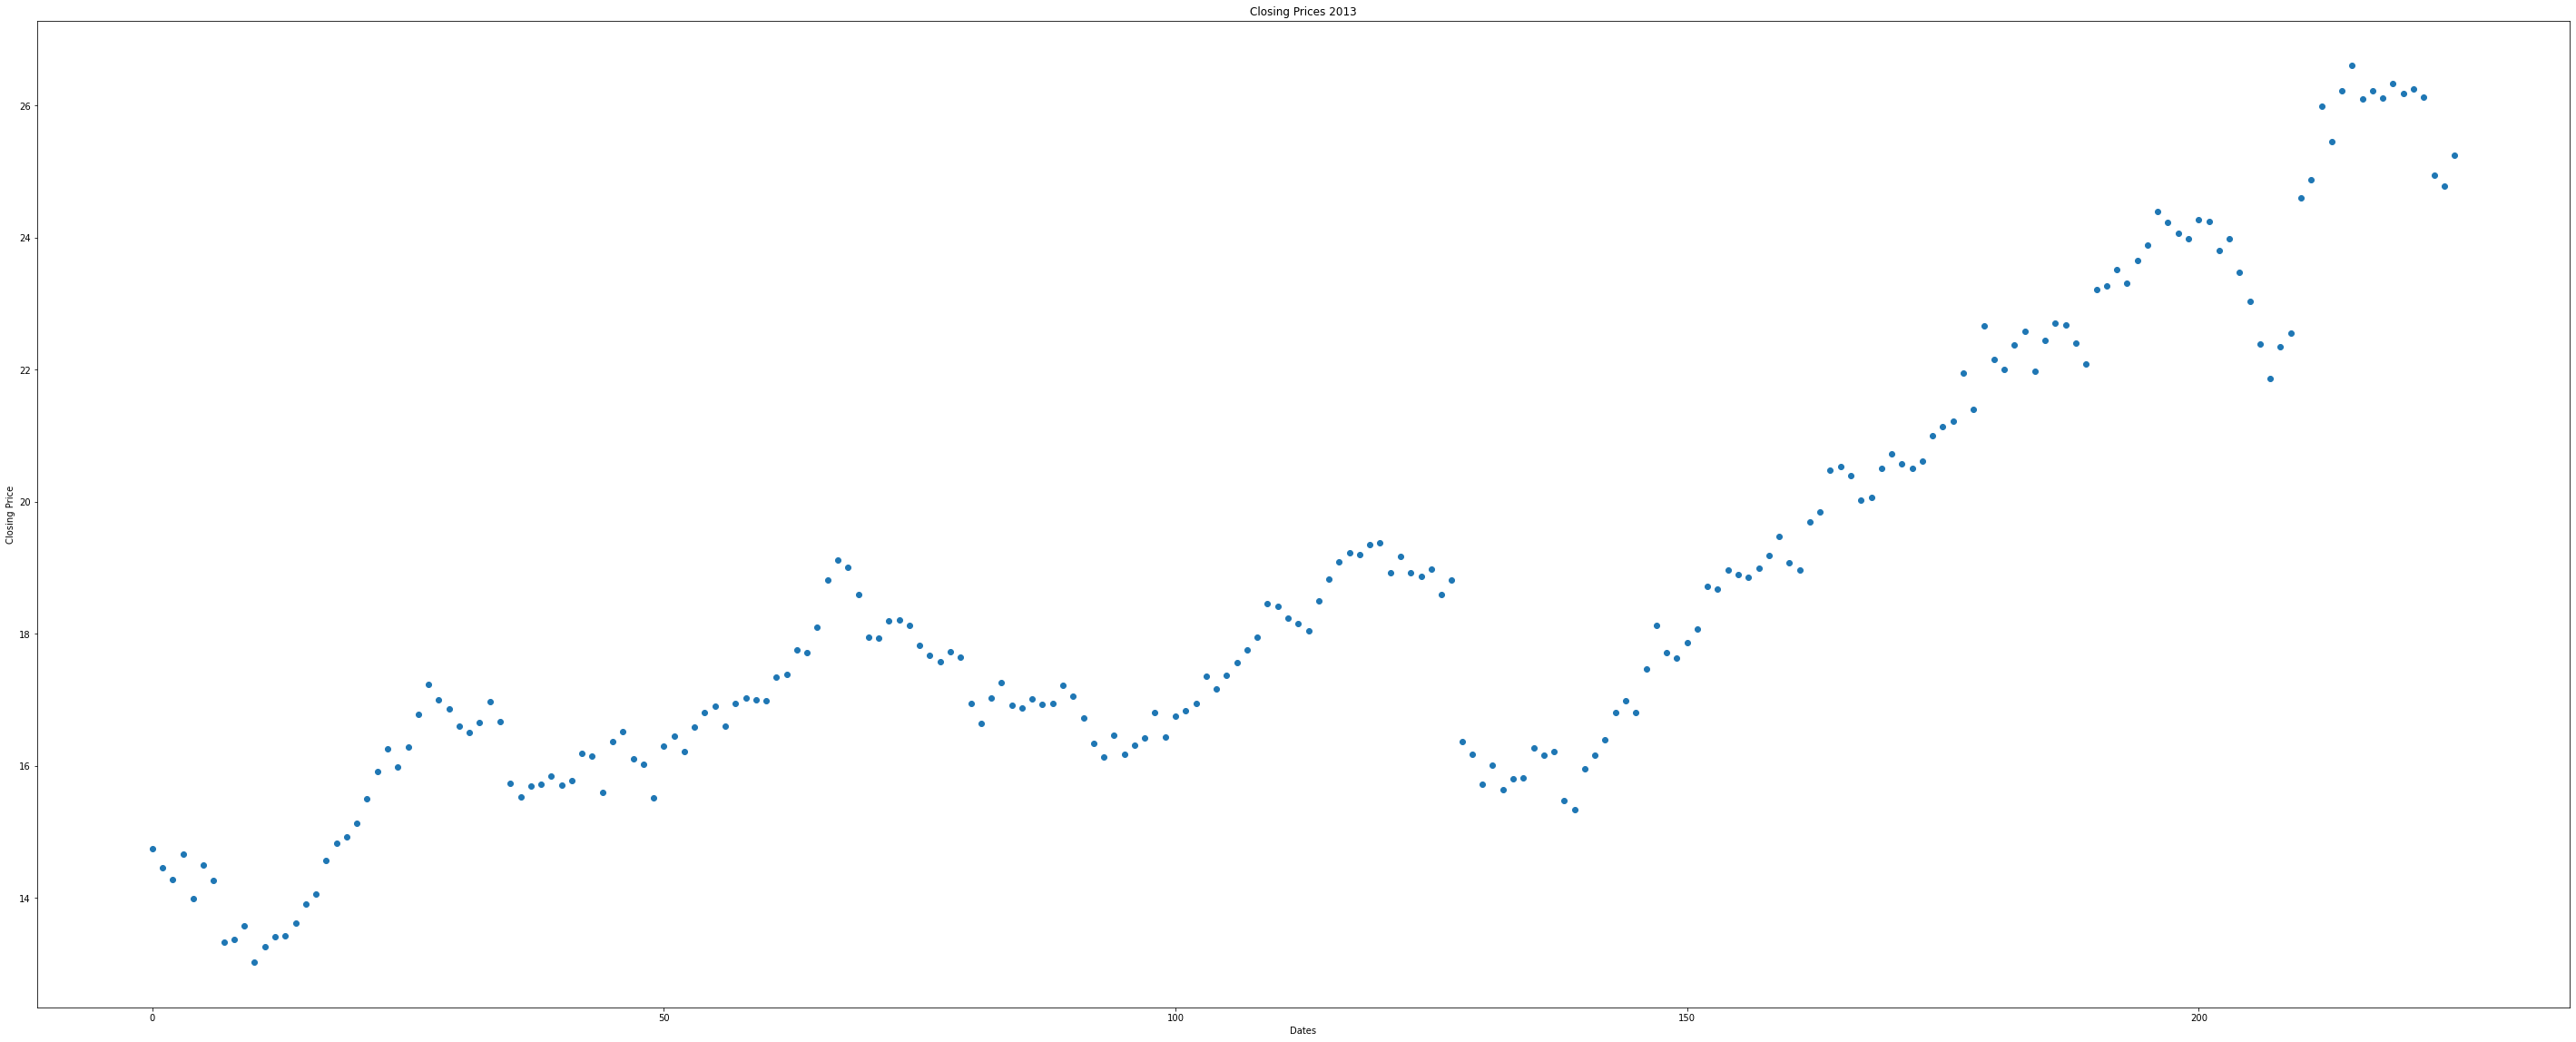

In [40]:
plt.figure(figsize = (50, 20))
plt.scatter(range(0, len(aal_stock_2013["close"])), aal_stock_2013["close"])
plt.title("Closing Prices 2013")
plt.xlabel("Dates")
plt.ylabel("Closing Price")
# plt.xticks(aal_stock_2013["date"], aal_stock_2013["date"], rotation = "vertical")
plt.show()

In [12]:
X = np.array(list(aal_stock_2013["open"]))
X_reshape = np.reshape(X, (len(X), 1))
X_reshape

array([[15.07],
       [14.89],
       [14.45],
       [14.3 ],
       [14.94],
       [13.93],
       [14.33],
       [14.17],
       [13.62],
       [13.57],
       [13.6 ],
       [13.14],
       [13.28],
       [13.49],
       [13.37],
       [13.5 ],
       [14.01],
       [14.52],
       [14.7 ],
       [14.99],
       [14.85],
       [15.14],
       [15.54],
       [15.98],
       [16.45],
       [15.8 ],
       [16.48],
       [17.13],
       [17.21],
       [17.1 ],
       [16.92],
       [16.67],
       [16.48],
       [17.  ],
       [17.02],
       [16.48],
       [15.82],
       [15.12],
       [15.17],
       [15.82],
       [16.07],
       [15.74],
       [15.77],
       [16.11],
       [16.2 ],
       [15.96],
       [16.17],
       [16.54],
       [16.1 ],
       [15.99],
       [15.33],
       [16.26],
       [16.55],
       [16.38],
       [16.7 ],
       [16.8 ],
       [16.91],
       [16.72],
       [17.02],
       [17.05],
       [17.15],
       [17.01],
       [

In [13]:
y = np.array(list(aal_stock_2013["close"]))
y

array([14.75, 14.46, 14.27, 14.66, 13.99, 14.5 , 14.26, 13.33, 13.37,
       13.57, 13.02, 13.26, 13.41, 13.43, 13.61, 13.9 , 14.05, 14.57,
       14.82, 14.92, 15.13, 15.5 , 15.91, 16.25, 15.98, 16.29, 16.78,
       17.23, 17.  , 16.86, 16.6 , 16.51, 16.65, 16.97, 16.67, 15.74,
       15.53, 15.69, 15.72, 15.84, 15.7 , 15.78, 16.19, 16.14, 15.59,
       16.37, 16.52, 16.1 , 16.02, 15.52, 16.3 , 16.45, 16.22, 16.59,
       16.81, 16.9 , 16.6 , 16.94, 17.02, 17.  , 16.98, 17.34, 17.38,
       17.76, 17.72, 18.1 , 18.81, 19.12, 19.01, 18.59, 17.95, 17.93,
       18.19, 18.21, 18.12, 17.83, 17.67, 17.57, 17.73, 17.65, 16.95,
       16.64, 17.02, 17.26, 16.92, 16.88, 17.01, 16.93, 16.95, 17.22,
       17.06, 16.73, 16.34, 16.13, 16.46, 16.17, 16.31, 16.42, 16.8 ,
       16.43, 16.75, 16.84, 16.94, 17.36, 17.17, 17.37, 17.56, 17.76,
       17.95, 18.45, 18.42, 18.23, 18.15, 18.05, 18.5 , 18.83, 19.09,
       19.23, 19.2 , 19.35, 19.38, 18.92, 19.17, 18.92, 18.87, 18.98,
       18.6 , 18.82,

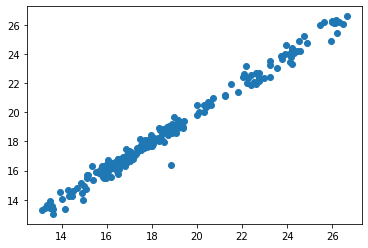

In [15]:
plt.scatter(X_reshape, y)
plt.show()

In [16]:
model = LinearRegression()
model

LinearRegression()

In [17]:
model.fit(X_reshape, y)
print(model)

LinearRegression()


In [18]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [0.98906881]
y-axis intercept:  0.19068920214719753


In [19]:
predictions = model.predict(X_reshape)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 14.75
Predicted output: 15.095956196267018
Prediction Error: 0.3459561962670179


In [20]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,15.095956,14.75,0.345956
1,14.917924,14.46,0.457924
2,14.482734,14.27,0.212734
3,14.334373,14.66,-0.325627
4,14.967377,13.99,0.977377
...,...,...,...
221,25.906478,26.25,-0.343522
222,26.025167,26.13,-0.104833
223,25.857025,24.94,0.917025
224,24.788831,24.78,0.008831


In [21]:
x_min = X_reshape.min()
x_max = X_reshape.max()

In [22]:
y_min_actual = y.min()
y_max_actual = y.max()

In [23]:
y_min = model.intercept_ + (model.coef_ * x_min)
y_max = model.intercept_ + (model.coef_ * x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 13.02
Calculated Min Value: [13.18705339]
Actual Max Value: 26.61
Calculated Max Value: [26.52959166]


In [24]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 13.02
Predicted Min Value: [13.18705339]
Actual Max Value: 26.61
Predicted Max Value: [26.52959166]


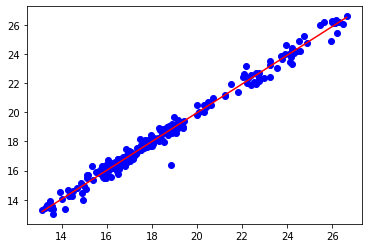

In [25]:
plt.scatter(X_reshape, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [11]:
#Scaling
# scaler = MinMaxScaler()
# feature_transform = scaler.fit_transform(testdf)
# feature_transform = pd.DataFrame(columns='close', data=traindf, index=df.index)
# feature_transform.head()

In [53]:
X = traindf
y = testdf

In [54]:
X

,open,high,low,volume
0,11.86,11.90,11.72,145217221
1,11.73,11.90,11.67,103499848
2,11.87,12.34,11.78,231771561
3,12.35,12.42,12.05,192478919
4,12.09,12.27,12.07,143901737
...,...,...,...,...
1254,32.00,32.50,31.96,62367448
1255,32.44,32.67,31.86,96971924
1256,31.12,31.98,29.15,155908256
1257,29.41,31.29,29.30,165878399


0       11.760
1       11.860
2       12.245
3       12.170
4       12.130
         ...  
1254    32.500
1255    31.950
1256    30.260
1257    31.200
1258    31.250
Name: close, Length: 1259, dtype: float64

In [56]:
# apply LinearRegression this is the code for the machine learning algorithm
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier


LogisticRegression()

In [57]:
# Train the Logistic Regression model on the unscaled data and print the model score
# this is what the machine algotirhtm will train and validate the data it learned.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [58]:
# Converting output labels to 0 and 1; assign the 0 or 1 into the definition of Low risk (1) or high risk (0)
# this step returns only 1 column, this case 

from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)



In [59]:
#view transformed values
print(y_transformed)

[ 13  16  38 ... 708 715 717]


In [60]:
classifier.fit(X, y_transformed)

LogisticRegression()

In [61]:
# Scale the data: 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver="lbfgs", random_state=19)
classifier


LogisticRegression(random_state=19)

In [64]:
y_transformed

array([ 13,  16,  38, ..., 708, 715, 717], dtype=int64)

In [66]:
X_train_scaled

array([[-0.58978927, -0.61286266, -0.61811702, -0.13992504],
       [-0.67048767, -0.67042559, -0.64442817, -0.93175679],
       [ 1.86387809,  1.90116664,  1.89898292, -0.87233277],
       ...,
       [ 1.28808415,  1.25772696,  1.2894413 , -0.79949617],
       [-0.09251269, -0.08548044, -0.08312365,  5.39150351],
       [ 1.36223943,  1.3238041 ,  1.30917466, -0.29290139]])

In [67]:
#Train our model
classifier.fit(X_train_scaled, y_transformed)


ValueError: Found input variables with inconsistent numbers of samples: [944, 1259]

In [ ]:
# see the score of LinearRegression model: 
classifier.score(X_test_scaled, y_transformed)

In [68]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model

from keras.utils.vis_utils import plot_model

In [69]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(traindf):
        X_train, X_test = traindf[:len(train_index)], traindf[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = testdf[:len(train_index)].values.ravel(), testdf[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [70]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [71]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [72]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
144/144 [==============================] - 1s 1ms/step - loss: 99353526272.0000
Epoch 2/100
144/144 [==============================] - 0s 1ms/step - loss: 181207.7031
Epoch 3/100
144/144 [==============================] - 0s 1ms/step - loss: 93.2901
Epoch 4/100
144/144 [==============================] - 0s 1ms/step - loss: 122.8280
Epoch 5/100
144/144 [==============================] - 0s 1ms/step - loss: 121.6304
Epoch 6/100
144/144 [==============================] - 0s 1ms/step - loss: 117.8500
Epoch 7/100
144/144 [==============================] - 0s 1ms/step - loss: 100.8582
Epoch 8/100
144/144 [==============================] - 0s 1ms/step - loss: 91.9173
Epoch 9/100
144/144 [==============================] - 0s 1ms/step - loss: 85.9545
Epoch 10/100
144/144 [==============================] - 0s 1ms/step - loss: 80.5925
Epoch 11/100
144/144 [==============================] - 0s 1ms/step - loss: 81.4429
Epoch 12/100
144/144 [==============================] - 0s 1ms/step 

In [74]:
#LSTM Prediction
y_pred= lstm.predict(X_test)
y_pred

array([[15.769247],
       [14.237997],
       [20.144247],
       [19.581747],
       [20.519247],
       [19.206747],
       [32.644245],
       [21.019247],
       [30.894247],
       [21.956747],
       [23.831747],
       [30.144247],
       [27.081747],
       [22.831747],
       [27.019247],
       [22.269247],
       [19.206747],
       [26.081747],
       [19.706747],
       [20.769247],
       [20.519247],
       [18.394247],
       [28.456747],
       [21.706747],
       [21.956747],
       [18.706747],
       [19.581747],
       [19.019247],
       [20.956747],
       [19.081747],
       [19.269247],
       [16.862997],
       [18.519247],
       [23.519247],
       [31.769247],
       [23.331747],
       [17.706747],
       [19.456747],
       [19.081747],
       [26.769247],
       [23.144247],
       [28.581747],
       [24.581747],
       [19.706747],
       [20.644247],
       [18.394247],
       [18.206747],
       [17.144247],
       [20.581747],
       [15.081747],


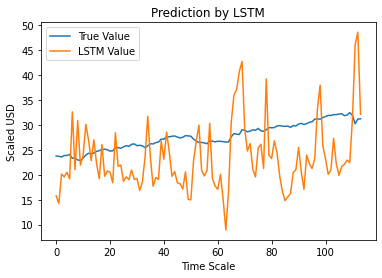

In [83]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [75]:
y_test

array([23.77 , 23.72 , 23.58 , 23.87 , 23.89 , 24.09 , 23.31 , 23.41 ,
       22.97 , 22.89 , 23.36 , 23.95 , 24.33 , 24.24 , 24.38 , 24.7  ,
       24.86 , 25.06 , 25.16 , 25.02 , 24.76 , 24.81 , 25.41 , 25.45 ,
       25.34 , 25.62 , 25.86 , 25.71 , 26.13 , 26.21 , 25.85 , 25.93 ,
       25.83 , 25.45 , 25.83 , 26.24 , 26.2  , 26.48 , 26.58 , 27.17 ,
       27.16 , 27.68 , 27.635, 27.74 , 27.8  , 27.6  , 27.39 , 27.53 ,
       27.87 , 27.82 , 27.75 , 27.18 , 26.79 , 26.49 , 26.51 , 26.4  ,
       26.24 , 26.79 , 26.76 , 26.62 , 26.74 , 26.73 , 26.66 , 26.59 ,
       26.59 , 27.64 , 28.28 , 28.17 , 28.1  , 29.06 , 28.93 , 28.64 ,
       28.78 , 29.05 , 28.94 , 29.32 , 28.84 , 28.73 , 29.04 , 29.48 ,
       29.45 , 29.48 , 29.82 , 29.88 , 29.78 , 29.73 , 29.8  , 29.52 ,
       29.9  , 29.8  , 30.19 , 30.33 , 30.12 , 30.27 , 30.55 , 30.66 ,
       31.19 , 31.24 , 31.18 , 31.48 , 31.72 , 31.94 , 31.92 , 32.09 ,
       32.09 , 32.2  , 32.28 , 31.88 , 32.   , 32.5  , 31.95 , 30.26 ,
      

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
# LSTMacc = round((accuracy_score(y_test,y_pred)*100),2)
# print(LSTMacc)

ValueError: continuous is not supported